In [2]:
import csv
import pandas as pd

plaan:
* column < 3 & column > 2
* column < 2 & column > 1
* column > 1

VÕI
* column < 3 & column > 1
* column > 1


In [21]:
input_f = 'limesurvey_feature_results_mapped_w_dims.csv'

data = []

with open(input_f, 'r') as fid:
    csv_reader = csv.DictReader(fid, delimiter=',')
    fieldnames = csv_reader.fieldnames
    for line in csv_reader:
        data.append(line)

In [41]:
initial_df = pd.DataFrame(data).iloc[:, 1:].astype(float)

In [ ]:
initial_df

In [48]:
feature_names = [
    'noun', 'adj', 'propn', 'adv', 'intj', 'cconj', 'sconj', 'adp', 'det', 'num', 'punct', 'symbol',
    'particle', 'pron', 'abbr', 'TTR', 'avg_word_len', 'avr_sent_len', 'hapax_legomena', 'coref', 'see_pron', 'see_det',
    '1st_pron', '2nd_pron', '3rd_pron', 'active_voice', 'passive_voice', '1st_prs_verb', '2nd_prs_verb', '3rd_prs_verb',
    'core_verb', 'verbtype_ratio', 'da_inf', 'gerund', 'supine', 'verb_particle', 'pres_tense', 'past_tense',
    'ind_mood', 'cond_mood', 'imp_mood', 'quot_mood', 'neg_polarity', 'nom_case', 'gen_case', 'part_case', 'ill_case',
    'ine_case', 'ela_case', 'alla_case', 'ade_case', 'abl_case', 'tra_case', 'ter_case', 'ess_case', 'abe_case',
    'com_case', 'nsubj', 'nsubj_cop', 'modal', 'acl:relc', 'csubj', 'csubj_cop', 'obj', 'ccomp', 'xcomp', 'obl', 'nmod',
    'appos', 'nummod', 'amod', 'advcl', 'voc', 'cop', 'conj', 'cc'   
]

## ABSTRAKTNE

In [62]:
def make_new_df(original_dataframe, dim_name, conditions):
    if conditions == 3:
        dim_present = initial_df.loc[(initial_df[dim_name] < 3) & (initial_df[dim_name] > 2), feature_names]
        dim_mildly_present = initial_df.loc[(initial_df[dim_name] < 2) & (initial_df[dim_name] > 1), feature_names]
        dim_not_present = initial_df.loc[initial_df[dim_name] < 1, feature_names]
        return dim_present, dim_mildly_present, dim_not_present
    else:
        dim_present = initial_df.loc[(initial_df[dim_name] < 3) & (initial_df[dim_name] > 1), feature_names]
        dim_not_present = initial_df.loc[initial_df[dim_name] < 1, feature_names]
        return dim_present, dim_not_present
        

In [65]:
abs_df, abs_not_df = make_new_df(initial_df, 'abs', 2)

In [59]:
dim_not_present = initial_df.loc[initial_df['abs'] < 1, feature_names]

In [114]:
abs_corr = abs_df.corr(method='pearson').round(2)
abs_corr

,noun,adj,propn,adv,intj,cconj,sconj,adp,det,num,...,obl,nmod,appos,nummod,amod,advcl,voc,cop,conj,cc
noun,1.00,0.65,0.32,-0.71,-0.13,-0.14,-0.16,0.51,0.11,0.50,...,0.33,0.80,0.19,0.52,0.55,0.10,0.41,-0.05,0.06,-0.14
adj,0.65,1.00,0.34,-0.27,0.02,-0.05,-0.27,0.11,-0.07,0.08,...,0.38,0.46,0.37,0.06,0.79,-0.23,0.36,-0.14,0.03,-0.05
propn,0.32,0.34,1.00,-0.37,0.07,-0.20,-0.22,0.30,-0.06,0.13,...,0.33,0.69,0.33,0.13,0.48,-0.21,0.24,-0.42,-0.05,-0.20
adv,-0.71,-0.27,-0.37,1.00,-0.00,0.21,-0.04,-0.39,-0.09,-0.36,...,-0.39,-0.70,0.06,-0.41,-0.19,-0.31,-0.29,0.31,0.04,0.21
intj,-0.13,0.02,0.07,-0.00,1.00,-0.03,-0.22,-0.01,-0.22,0.14,...,0.05,-0.06,0.28,0.13,-0.10,-0.17,0.51,-0.02,-0.09,-0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
advcl,0.10,-0.23,-0.21,-0.31,-0.17,-0.28,0.65,0.03,0.15,0.03,...,0.04,0.01,-0.15,0.15,-0.14,1.00,0.24,-0.05,-0.33,-0.28
voc,0.41,0.36,0.24,-0.29,0.51,-0.26,-0.07,0.22,0.06,0.30,...,0.25,0.31,0.55,0.33,0.23,0.24,1.00,0.01,-0.12,-0.26
cop,-0.05,-0.14,-0.42,0.31,-0.02,0.25,-0.30,-0.28,0.27,-0.23,...,-0.58,-0.22,0.07,-0.27,-0.31,-0.05,0.01,1.00,0.34,0.25
conj,0.06,0.03,-0.05,0.04,-0.09,0.66,-0.58,-0.03,0.17,-0.21,...,-0.41,-0.07,-0.04,-0.21,0.06,-0.33,-0.12,0.34,1.00,0.66


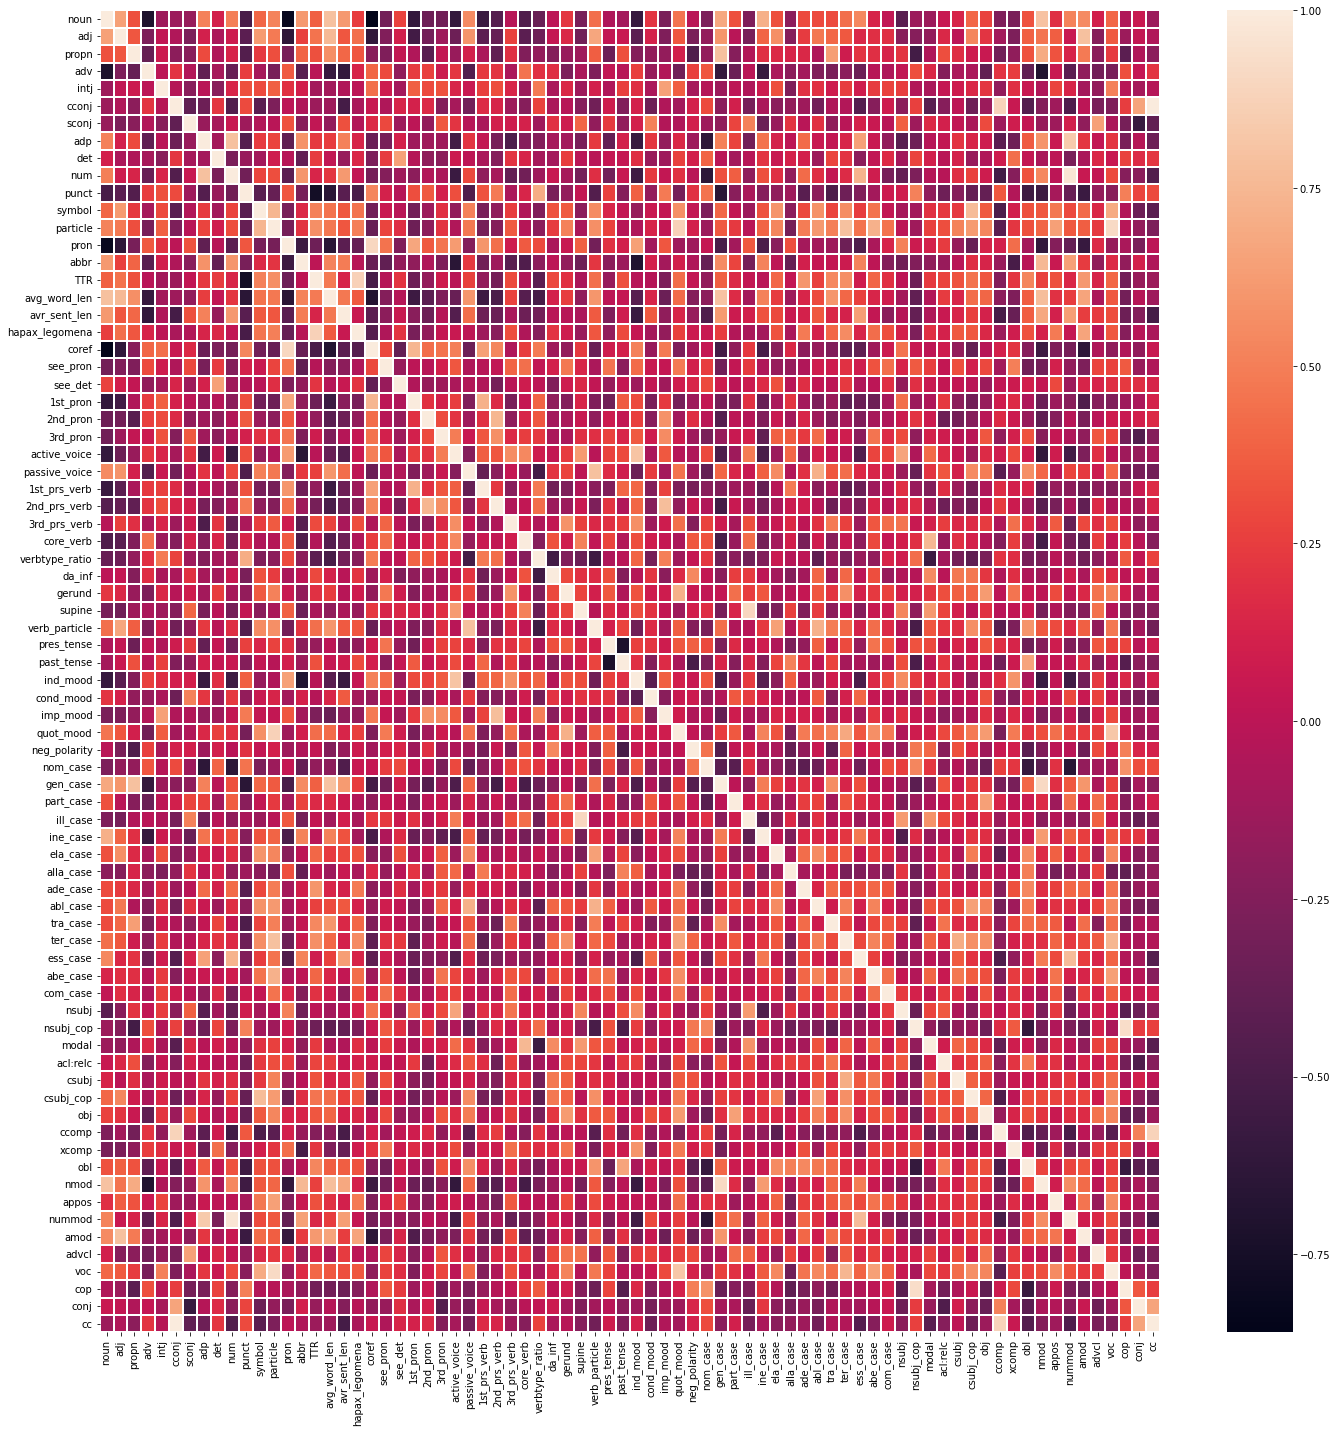

In [115]:
abs_corr.to_csv('abs_present.csv')

fig,ax = plt.subplots(1,1,figsize=(20,20))
hmap=sns.heatmap(abs_corr, linewidths=0.1, ax=ax)

hmap.figure.savefig("Correlation_Heatmap_with_Seaborn.png",
                    format='png',
                    dpi=150)

## AFEKTIIVNE

## AEG

## ARGUMENTATIIVNE

## FORMAALNE

## IMPERSONAALNE

## INFO

## INSTRUEERIV

## INTERAKTIIVNE

## KEER

## SPONT

## SUBJ